path /Users/Austi/OneDrive/NYU/Machine Learning/PROJECT_NEW/2021_NFL_COMBINE_RESORTED.csv
data file length: 526
X train rows: 350
X train columns: 19
Y train rows: 350
X test rows: 176
X test columns: 19
Y test rows: 176
logreg training accuracy: 0.974286
176
prediction probability:
[[1.         0.         0.        ]
 [0.99999985 0.         0.00000015]
 [0.00000027 0.         0.99999973]
 [0.99977821 0.00001034 0.00021145]
 [0.00000069 0.         0.99999931]
 [0.         0.         1.        ]
 [0.00000004 0.         0.99999996]
 [0.         0.00000027 0.99999973]
 [0.00000002 0.         0.99999998]
 [0.00000003 0.         0.99999997]
 [0.         0.         1.        ]
 [0.99999829 0.         0.00000171]
 [0.99999998 0.         0.00000002]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.00131488 0.         0.99868512]
 [0.00014738 0.00001031 0.99984231]
 [0.88083446 0.         0.11916554]
 [0.         0.         1.        ]
 [0.99921487 0.         0.000785

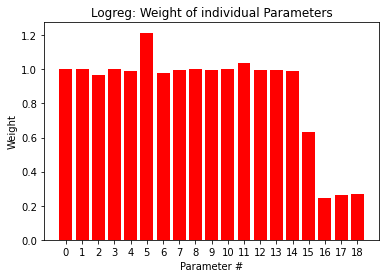

Multi-layer Perceptron r2 value:
0.6534090909090909
mlp predictions vs real results %:
100.0
GradientBoostingClassifier r2 value:
0.9034090909090909
gbc predictions vs real results %:
100.0


In [1]:
import os
import pandas as pd
import math
import numpy as np
import pprint
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

from collections import Counter

from sklearn import svm, datasets

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#Link to dataset description
# https://www.kaggle.com/datasets/thedevastator/nfl-team-stats-and-outcomes



#MAIN
s = '/Users/Austi/OneDrive/NYU/Machine Learning/PROJECT_NEW/2021_NFL_COMBINE_RESORTED.csv'
print('path', s)

#define csv headers
headerList = ['Team 1',	'Team 2',' Week', 'Day', 'Date', 'Opp.1', '1stD', 'TotYd', 'PassY', 'RushY', 'TO', '1stD.1', 'TotYd.1', 'PassY.1', 'RushY.1', 'TO.1', 'Offense', 'Defense', 'Sp. Tms', 'Result']
headerList_short = ['Team 1',	'Team 2',' Week', 'Day', 'Date', 'Opp.1', '1stD', 'TotYd', 'PassY', 'RushY', 'TO', '1stD.1', 'TotYd.1', 'PassY.1', 'RushY.1', 'TO.1', 'Offense', 'Defense', 'Sp. Tms']

#read in csv file, add headers
df = pd.read_csv(s)
df.to_csv(s, index=False)

print('data file length: %d' % len(df))


#Label encoding columns "Day", "Date", "Result", "Opp", "Team"
label_encoder = LabelEncoder()

df['Day'] = label_encoder.fit_transform(df['Day'])
df['Date'] = label_encoder.fit_transform(df['Date'])
df['Result'] = label_encoder.fit_transform(df['Result'])
df['Team 2'] = label_encoder.fit_transform(df['Team 2'])
df['Team 1'] = label_encoder.fit_transform(df['Team 1'])




#define array -- Using first 12 weeks of NFL season as training set
X_train = df.iloc[0:350, 2:21].values
y_train = df.iloc[0:350, 21].values

print('X train rows: %d' % len(X_train))
print('X train columns: %d' % len(X_train[0]))
print('Y train rows: %d' % len(y_train))

#define array -- Using weeks 13-18 of NFL season as test set
X_test = df.iloc[350:527, 2:21].values
y_test = df.iloc[350:527, 21].values

print('X test rows: %d' % len(X_test))
print('X test columns: %d' % len(X_test[0]))
print('Y test rows: %d' % len(y_test))

#################################################################################################
#Logistic Regression
logreg = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, random_state=1)

logreg.fit(X_train,y_train)

#calculate/print training accuracy
train_accuracy_logreg = logreg.score(X_train, y_train)
print('logreg training accuracy: %.6f' % train_accuracy_logreg)

#predict weeks 13-18 game results
predictions_logreg = logreg.predict(X_test)

#print model results
#print('model predictions:')
#print(predictions_logreg)

#print actual game results
#print('actual results:')
#print(y_test)

#print prediction probability 
# 0 = team 1 loss
# 1 = team 1 tie
# 2 = team 1 win
np.set_printoptions(suppress=True)
print(len(logreg.predict_proba(X_test)))
print('prediction probability:')
print(logreg.predict_proba(X_test))


#print accuracy % between predictions and y_test
accuracy_percent_logreg = len(set(predictions_logreg) & set(y_test)) / float(len(set(predictions_logreg) | set(y_test))) * 100
print('logreg predictions vs real results %:')
print(accuracy_percent_logreg)

#print logreg score(), r2
score_logreg = logreg.score(X_test,y_test)
print('logistic regression r2 value:')
print(score_logreg)

#print classification report
print('logistic regression classification report:')
print(classification_report(predictions_logreg, y_test))

#find/print param weights
sum_logreg = 0.0
param_weights_logreg = []
for x in logreg.coef_[0]:
    weight = pow(math.e, x)
    param_weights_logreg.append(weight)
    sum_logreg = sum_logreg + weight
    
param_weights_dict_logreg = {}
for x in range(len(param_weights_logreg)):
    param_weights_dict_logreg[x] = [param_weights_logreg[x], headerList[x]]
    
print('Total weights sum is %.2f' % sum_logreg)
pprint.pprint(param_weights_dict_logreg)

#print feature weights
integers = []
counter = 0
while counter < 41:
    integers.append(counter)
    counter = counter + 1
    
strlist = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']

  
#plot param weights
#plt.rcParams.update({'font.size': 14})
plt.xlabel("Parameter #")
plt.ylabel("Weight")
plt.title("Logreg: Weight of individual Parameters")
#plt.rcParams["figure.figsize"] = [16,9]

plt.bar(strlist, param_weights_logreg, color='red')
plt.show()

######################################################################################################
#GradientBoostingClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1).fit(X_train,y_train)
                                 
mlp_score = mlp.score(X_test,y_test)
print('Multi-layer Perceptron r2 value:')
print(mlp_score)

#predict weeks 13-18 game results
predictions_mlp = mlp.predict(X_test)

#print accuracy % between predictions and y_test
accuracy_percent_mlp = len(set(predictions_mlp) & set(y_test)) / float(len(set(predictions_mlp) | set(y_test))) * 100
print('mlp predictions vs real results %:')
print(accuracy_percent_mlp)





######################################################################################################
#GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, 
                                 max_depth=1, random_state=0).fit(X_train, y_train)
                                 
gbc_score = gbc.score(X_test,y_test)
print('GradientBoostingClassifier r2 value:')
print(gbc_score)

#predict weeks 13-18 game results
predictions_gbc = gbc.predict(X_test)

#print accuracy % between predictions and y_test
accuracy_percent_gbc = len(set(predictions_gbc) & set(y_test)) / float(len(set(predictions_gbc) | set(y_test))) * 100
print('gbc predictions vs real results %:')
print(accuracy_percent_gbc)

#R2 score is how well the model fit to the data, 1 is perfect

















